# background intensity

In [1]:
import sys
import pandas as pd
Yourdir = '/Users/Jacob/Documents/WpenPattern'
sys.path.append(Yourdir)
import WpenPattern.BacDeduct as BacDeduct

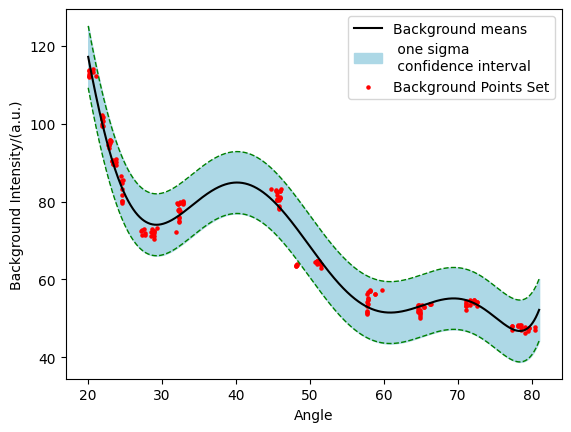

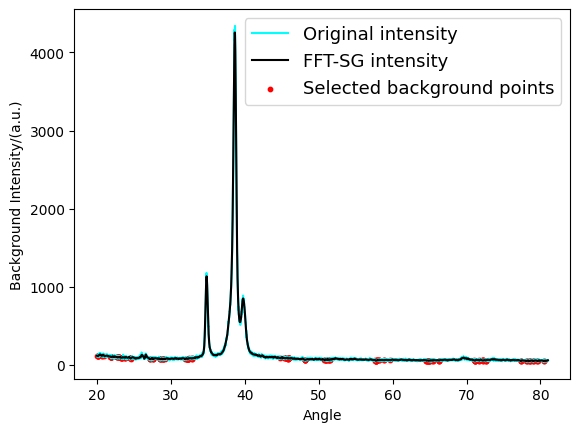

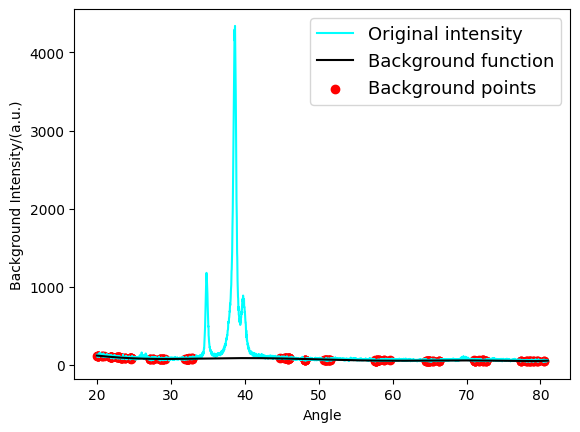

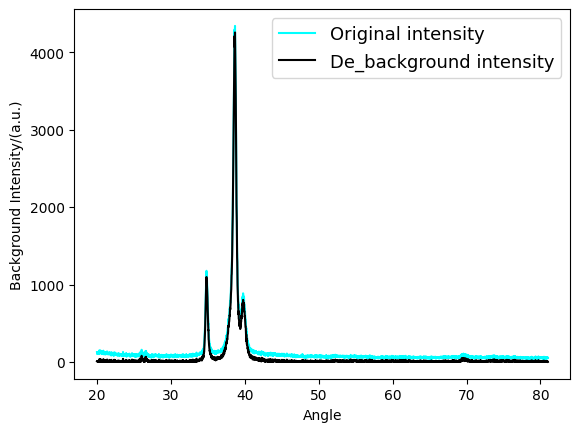

7.94262164211025

<Figure size 640x480 with 0 Axes>

In [4]:
TF = BacDeduct.TwiceFilter()
intensity_csv = pd.read_csv(r'intensity.csv',header=None )
Var = TF.FFTandSGFilter(intensity_csv,lowAngleRange=25,poly_n=7,bac_split=8,bac_num=200 )
Var

# cal HKL list

In [9]:
import sys
import pandas as pd

import WpenPattern.XRDpre as xrd

In [17]:
L_alpha, S_alpha = xrd.profile(wavelength='CuKa1',two_theta_range=(30,80)).generate('alpha.cif')

cif file parse completed
searched all peaks satisified Bragg law
extinction peaks are distinguished
There are 0 extinction peaks
result saved !


# WPEM fitting

Started at Sat Apr 22 09:11:16 2023
WPEM package : Whole Pattern fitting of powder X-ray diffraction by Expectation Maximum  
WPEM V2.0.0, March 2, 2022, MGI, SHU, Shanghai, CHINA.
Reference paper : Doi
------------------------------------------------------------------
The input HKL document does not contain [Code] column
Diffraction indexs have been obtained by WPEM
Diffraction indexs have been obtained by WPEM
The input crystal system is: Hexagonal The initial inputs : 2.95 2.95 4.68 90.0 90.0 120.0
The input crystal system is: Cubic The initial inputs : 3.3065 3.3065 3.3065 90.0 90.0 90.0
1-th iterations
[[2.9539846044986873, 2.9539846044986873, 4.675795546087235, 90.0, 90.0, 120.0], [3.304311914437264, 3.304311914437264, 3.304311914437264, 90.0, 90.0, 90.0]]
Rp:25.181    Rwp:33.019    Raquare:18.637
2-th iterations
[[2.9597494541799385, 2.9597494541799385, 4.6709659241275805, 90.0, 90.0, 120.0], [3.3025418017453716, 3.3025418017453716, 3.3025418017453716, 90.0, 90.0, 90.0]]
Rp:19.9

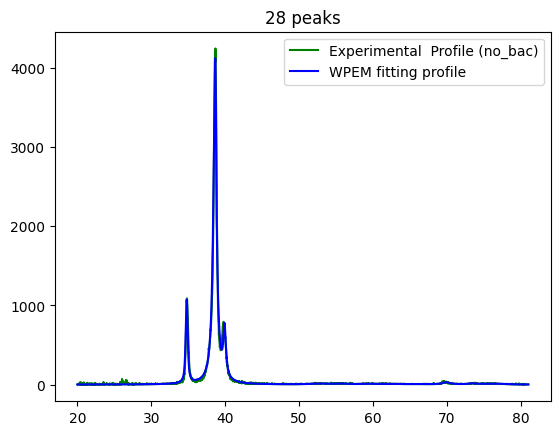

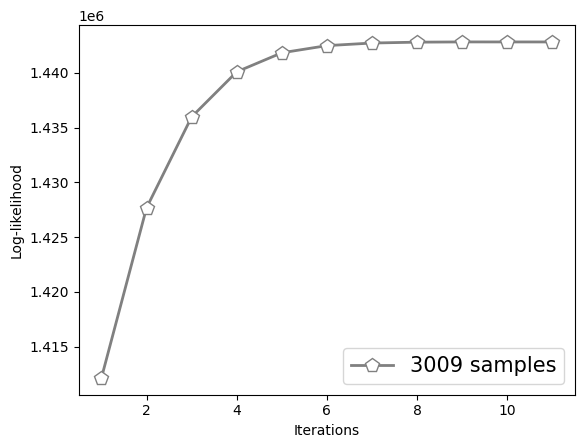

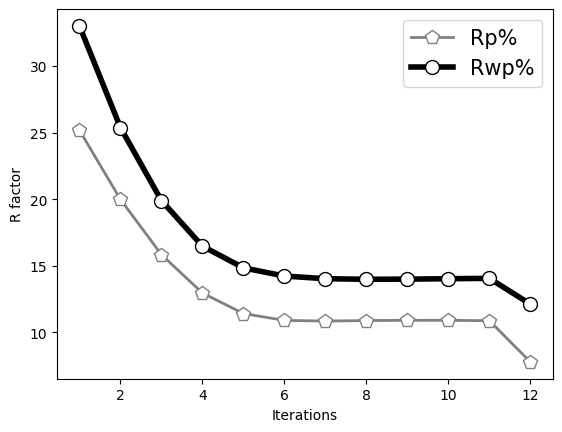

If you want to get the accurately determined of volume fraction 
 Please input the parameter of structure factor!
11-th iterations, reach the limit of lock_num.
 Rp: 7.773
Rwp: 12.117 
WPEM program running time :  0 hours 0 minute  32 second  


<Figure size 640x480 with 0 Axes>

In [5]:
if __name__ == "__main__":

    import WpenPattern.WPEMModel as WPEMModel

    # The wavelength is set according to the actual light source
    wavelength = [1.540593, 1.544414]
    
    # Enter the file name to read on the right side of the equal sign. 
    # Please remember to quote, string.
    
    # The file name of non-background data (2theta-intensity data)
    no_bac_intensity_file = "no_bac_intensity.csv" 
    # The file name of raw/original data (2theta-intensity data)
    original_file = "intensity.csv"  
    # The file name of background data (2theta-intensity data)
    bacground_file = "bac.csv"  


    # Input the initial lattice constants {a, b, c, α, β, γ}, whose values need to be assumed at initialization.
    
    Lattice_constants = [[2.95, 2.95, 4.68, 90.0, 90.0, 120.0],
                         [3.3065, 3.3065, 3.3065, 90.0, 90.0, 90.0,],
                        ]
  
    # Lattice_constants = [L_Cu,L_CuO,L_Cu2O]
    # Execute the model
    WPEMModel.Built().fit(
        wavelength, Var, Lattice_constants,no_bac_intensity_file, original_file, bacground_file, 
        subset_number=5,low_bound=30,up_bound=55,bta = 0.85, iter_max = 200, EXACT=True, 
        LogPrint = True, num = 5,asy_C = 0,cpu=4)
 

# decomposed

Name assigned successfully


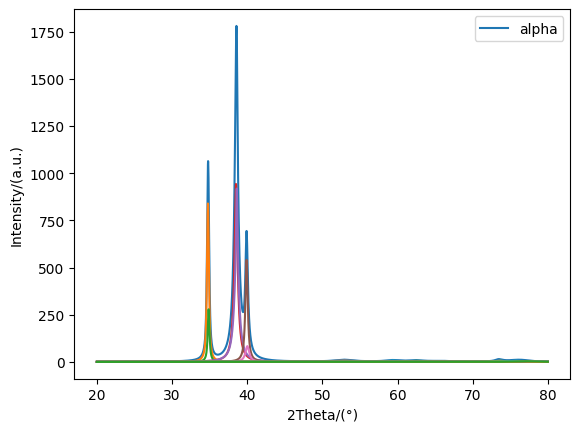

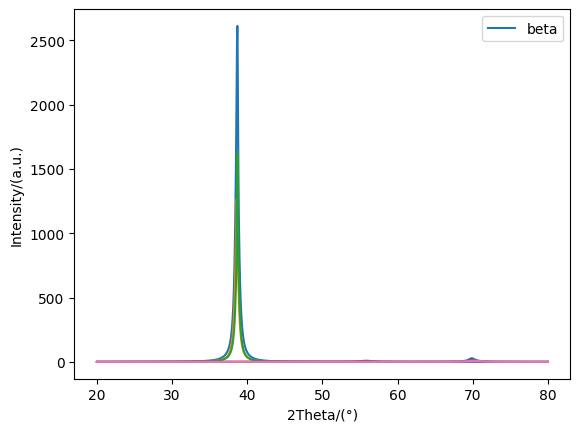

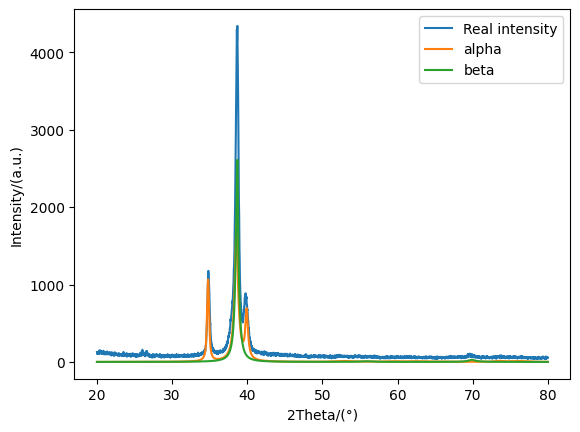

volume fraction estimate in % (calculated by integral area): [58.532366918287124, 41.467633081712876] 
 Saved at the DecomposedComponents document


In [6]:
import WpenPattern.Decomposedpeaks as DP
wavelength = [1.540593, 1.544414]
DP.Decomposedpeaks().decomposition_peak(lowboundary=20, upboundary=80,wavelength = wavelength, name = ['alpha','beta',],phase=2)